In [1]:
from driver_comparisons import  main, plot_driver_speed_change, get_driver_lap_comparison,fastest_laptimes, fastest_lap_comparison, driver_gear_changes, get_driver_aws_data

In [2]:
silverstone_p1 = main(2022, "British", "Practice 1")

core           INFO 	Loading data for British Grand Prix - Practice 1 [v2.2.4]
api            INFO 	Using cached data for driver_info
/opt/anaconda3/envs/Formula1/lib/python3.9/site-packages/fastf1/ergast.py:61: UserWarning: Request returned: 403
  warnings.warn(f"Request returned: {r.status_code}")
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5',

In [3]:
silverstone_p1.weather_data['TrackTemp']




0     26.8
1     26.7
2     26.8
3     26.9
4     26.6
      ... 
72    26.4
73    25.2
74    24.8
75    24.6
76    24.4
Name: TrackTemp, Length: 77, dtype: float64

Text(0, 0.5, 'Temperature (*C)')

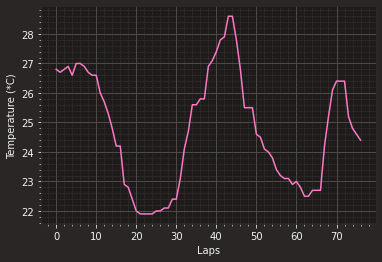

In [4]:
from matplotlib import pyplot
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# create the figure and axis objects
fig, ax = plt.subplots()
# plot the data and customize
ax.plot(silverstone_p1.weather_data['TrackTemp'])
ax.set_xlabel('Laps')
ax.set_ylabel('Temperature (*C)')


In [5]:
from static_plot import static_track_temp, static_track_conditions
from animated_line_plot import animate, initilze_plot, run_live_plot


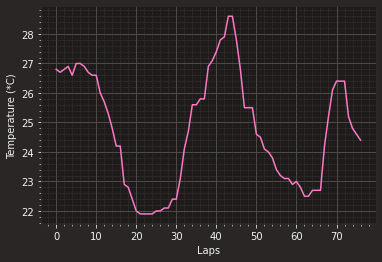

In [6]:
static_track_temp(silverstone_p1)

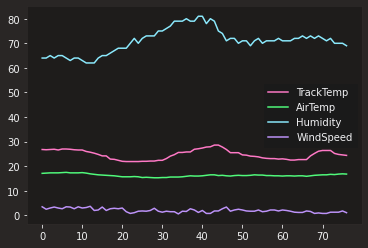

In [7]:
static_track_conditions(silverstone_p1)

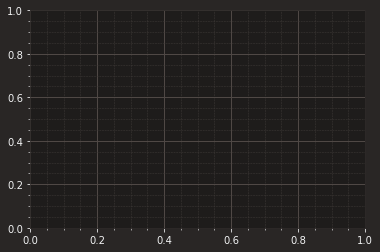

In [8]:
# animated_line_plot.py

from random import randint

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# create empty lists for the x and y data
x = []
y = []

# create the figure and axes objects
fig, ax = plt.subplots()

# function that draws each frame of the animation
def animate(i):
    pt = randint(1,9) # grab a random integer to be the next y-value in the animation
    x.append(i)
    y.append(pt)

    ax.clear()
    ax.plot(x, y)
    ax.set_xlim([0,20])
    ax.set_ylim([0,10])
# run the animation
ani = FuncAnimation(fig, animate, frames=20, interval=500, repeat=False)

plt.show()


In [9]:
silverstone_weather_df = silverstone_p1.weather_data
silverstone_weather_df


,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:40.904000,17.1,64.0,998.4,False,26.8,236,3.5
1,0 days 00:01:40.900000,17.2,64.0,998.4,False,26.7,240,2.5
2,0 days 00:02:40.899000,17.3,65.0,998.4,False,26.8,239,3.0
3,0 days 00:03:40.907000,17.3,64.0,998.2,False,26.9,230,3.4
4,0 days 00:04:40.904000,17.3,65.0,998.4,False,26.6,242,3.0
...,...,...,...,...,...,...,...,...
72,0 days 01:12:41.057000,16.7,72.0,998.4,False,26.4,240,1.3
73,0 days 01:13:41.063000,16.6,70.0,998.4,False,25.2,221,1.3
74,0 days 01:14:41.056000,16.8,70.0,998.4,True,24.8,267,1.3
75,0 days 01:15:41.058000,16.9,70.0,998.4,True,24.6,263,1.8


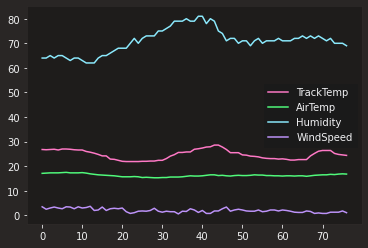

In [10]:
silverstone_tracktemp = silverstone_weather_df[['TrackTemp',"AirTemp","Humidity","WindSpeed"]]
from pandas import read_csv
from matplotlib import pyplot

silverstone_tracktemp.plot()
pyplot.show()

In [11]:
df_silverstone_p1= silverstone_p1.laps
df_silverstone_p1 = df_silverstone_p1[df_silverstone_p1["LapTime"].notna()]
df_silverstone_p1.sort_values(["LapTime"])


,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
78,0 days 01:10:44.201000,77,0 days 00:01:42.249000,7,2,NaT,NaT,0 days 00:00:31.976000,0 days 00:00:42.285000,0 days 00:00:27.988000,...,True,INTERMEDIATE,8.0,False,0 days 01:09:01.952000,Alfa Romeo,BOT,1,True,2022-07-01 12:54:01.960
22,0 days 01:13:46.254000,44,0 days 00:01:42.781000,9,4,NaT,NaT,0 days 00:00:29.370000,0 days 00:00:47.322000,0 days 00:00:26.089000,...,True,SOFT,NaN,True,0 days 01:12:03.473000,Mercedes,HAM,2,True,2022-07-01 12:57:03.481
6,0 days 00:34:06.466000,55,0 days 00:01:42.967000,4,2,NaT,NaT,0 days 00:00:32.629000,0 days 00:00:42.346000,0 days 00:00:27.992000,...,True,INTERMEDIATE,5.0,False,0 days 00:32:23.499000,Ferrari,SAI,1,True,2022-07-01 12:17:23.507
75,0 days 00:42:14.769000,77,0 days 00:01:43.437000,4,1,NaT,NaT,0 days 00:00:32.447000,0 days 00:00:42.861000,0 days 00:00:28.129000,...,False,INTERMEDIATE,4.0,True,0 days 00:40:31.332000,Alfa Romeo,BOT,1,True,2022-07-01 12:25:31.340
45,0 days 00:21:22.480000,16,0 days 00:01:43.801000,3,1,NaT,NaT,0 days 00:00:32.730000,0 days 00:00:42.793000,0 days 00:00:28.278000,...,True,INTERMEDIATE,3.0,True,0 days 00:19:38.679000,Ferrari,LEC,1,True,2022-07-01 12:04:38.687
12,0 days 00:43:49.426000,47,0 days 00:01:43.895000,2,1,NaT,NaT,0 days 00:00:32.180000,0 days 00:00:43.123000,0 days 00:00:28.592000,...,True,INTERMEDIATE,2.0,True,0 days 00:42:05.531000,Haas F1 Team,MSC,1,True,2022-07-01 12:27:05.539
64,0 days 00:33:45.754000,4,0 days 00:01:44.337000,2,2,NaT,0 days 00:33:39.723000,0 days 00:00:32.985000,0 days 00:00:43.210000,0 days 00:00:28.142000,...,False,INTERMEDIATE,1.0,True,0 days 00:32:01.417000,McLaren,NOR,1,False,2022-07-01 12:17:01.425
44,0 days 00:19:38.679000,16,0 days 00:01:44.769000,2,1,NaT,NaT,0 days 00:00:33.175000,0 days 00:00:43.592000,0 days 00:00:28.002000,...,False,INTERMEDIATE,2.0,True,0 days 00:17:53.910000,Ferrari,LEC,1,True,2022-07-01 12:02:53.918
21,0 days 01:12:03.473000,44,0 days 00:01:44.798000,8,4,NaT,NaT,0 days 00:00:29.808000,0 days 00:00:49.418000,0 days 00:00:25.572000,...,False,SOFT,NaN,True,0 days 01:10:18.675000,Mercedes,HAM,1,True,2022-07-01 12:55:18.683
73,0 days 00:38:20.828000,77,0 days 00:01:46.056000,2,1,NaT,NaT,0 days 00:00:33.593000,0 days 00:00:43.818000,0 days 00:00:28.645000,...,False,INTERMEDIATE,2.0,True,0 days 00:36:34.772000,Alfa Romeo,BOT,1,True,2022-07-01 12:21:34.780


In [12]:
df_silverstone_p1.columns

Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'LapStartTime', 'Team', 'Driver',
       'TrackStatus', 'IsAccurate', 'LapStartDate'],
      dtype='object')

In [13]:
silverstone_p2 = main(2022, "British", "FP2")

core           INFO 	Loading data for British Grand Prix - Practice 2 [v2.2.4]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
/opt/anaconda3/envs/Formula1/lib/python3.9/site-packages/fastf1/ergast.py:61: UserWarning: Request returned: 403
  warnings.warn(f"Request returned: {r.status_code}")
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data fou

In [16]:
def sort_fastest_practice_time(session):
    df_silverstone_p= session.laps
    df_silverstone_p = df_silverstone_p[df_silverstone_p["LapTime"].notna()]
    df_silverstone_p = df_silverstone_p.sort_values(["LapTime"])
    return(df_silverstone_p)

In [67]:
sort_fastest_practice_time(silverstone_p2).head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
33,0 days 00:51:39.619000,55,0 days 00:01:28.942000,16,3,NaT,NaT,0 days 00:00:28.439000,0 days 00:00:36.209000,0 days 00:00:24.294000,...,True,SOFT,6.0,False,0 days 00:50:10.677000,Ferrari,SAI,1,True,2022-07-01 15:35:10.688
30,0 days 00:45:36.123000,55,0 days 00:01:29.014000,13,2,NaT,NaT,0 days 00:00:28.509000,0 days 00:00:36.084000,0 days 00:00:24.421000,...,False,SOFT,NaN,True,0 days 00:44:07.109000,Ferrari,SAI,1,True,2022-07-01 15:29:07.120
86,0 days 00:58:36.722000,44,0 days 00:01:29.105000,12,2,NaT,NaT,0 days 00:00:28.702000,0 days 00:00:36.044000,0 days 00:00:24.359000,...,True,SOFT,NaN,True,0 days 00:57:07.617000,Mercedes,HAM,1,True,2022-07-01 15:42:07.628
369,0 days 00:43:04.468000,4,0 days 00:01:29.118000,12,2,NaT,NaT,0 days 00:00:28.481000,0 days 00:00:36.173000,0 days 00:00:24.464000,...,True,SOFT,3.0,True,0 days 00:41:35.350000,McLaren,NOR,1,True,2022-07-01 15:26:35.361
9,0 days 00:57:44.123000,1,0 days 00:01:29.149000,10,2,NaT,NaT,0 days 00:00:28.599000,0 days 00:00:36.105000,0 days 00:00:24.445000,...,True,SOFT,3.0,True,0 days 00:56:14.974000,Red Bull Racing,VER,1,True,2022-07-01 15:41:14.985


['VER' 'SAI' 'MSC' 'HAM' 'OCO' 'ZHO' 'ALB' 'TSU' 'MAG' 'STR' 'LEC' 'ALO'
 'PER' 'GAS' 'LAT' 'VET' 'NOR' 'RIC' 'RUS' 'BOT']


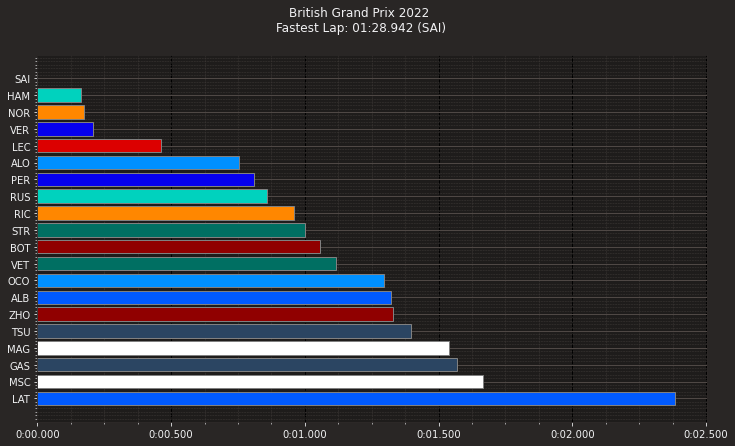

In [66]:
fastest_laptimes(silverstone_p2)

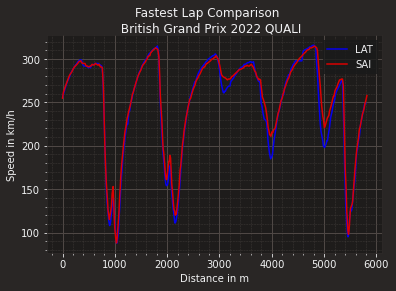

In [69]:
fastest_lap_comparison("LAT","SAI", silverstone_p2)

In [74]:
carlo_GP = prac2_BGP.pick_driver(55)

carlo_GP = carlo_GP.sort_values(by=["LapTime"], ascending=True)


In [75]:
carlo_GP

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
33,0 days 00:51:39.619000,55,0 days 00:01:28.942000,16,3,NaT,NaT,0 days 00:00:28.439000,0 days 00:00:36.209000,0 days 00:00:24.294000,...,True,SOFT,6.0,False,0 days 00:50:10.677000,Ferrari,SAI,1,True,2022-07-01 15:35:10.688
30,0 days 00:45:36.123000,55,0 days 00:01:29.014000,13,2,NaT,NaT,0 days 00:00:28.509000,0 days 00:00:36.084000,0 days 00:00:24.421000,...,False,SOFT,NaN,True,0 days 00:44:07.109000,Ferrari,SAI,1,True,2022-07-01 15:29:07.120
27,0 days 00:33:03.435000,55,0 days 00:01:29.543000,10,1,NaT,NaT,0 days 00:00:28.932000,0 days 00:00:36.194000,0 days 00:00:24.417000,...,False,MEDIUM,10.0,True,0 days 00:31:33.892000,Ferrari,SAI,1,True,2022-07-01 15:16:33.903
22,0 days 00:23:40.157000,55,0 days 00:01:29.962000,5,1,NaT,NaT,0 days 00:00:28.862000,0 days 00:00:36.554000,0 days 00:00:24.546000,...,False,MEDIUM,5.0,True,0 days 00:22:10.195000,Ferrari,SAI,1,True,2022-07-01 15:07:10.206
20,0 days 00:19:56.777000,55,0 days 00:01:30.880000,3,1,NaT,NaT,0 days 00:00:29.193000,0 days 00:00:36.845000,0 days 00:00:24.842000,...,False,MEDIUM,3.0,True,0 days 00:18:25.897000,Ferrari,SAI,1,True,2022-07-01 15:03:25.908
36,0 days 01:04:24.682000,55,0 days 00:01:33.219000,19,4,NaT,NaT,0 days 00:00:29.739000,0 days 00:00:37.858000,0 days 00:00:25.622000,...,False,SOFT,10.0,None,0 days 01:02:51.463000,Ferrari,SAI,1,True,2022-07-01 15:47:51.474
38,0 days 01:07:31.559000,55,0 days 00:01:33.338000,21,4,NaT,NaT,0 days 00:00:30.053000,0 days 00:00:37.772000,0 days 00:00:25.513000,...,False,SOFT,12.0,None,0 days 01:05:58.221000,Ferrari,SAI,1,True,2022-07-01 15:50:58.232
37,0 days 01:05:58.221000,55,0 days 00:01:33.539000,20,4,NaT,NaT,0 days 00:00:29.966000,0 days 00:00:37.930000,0 days 00:00:25.643000,...,False,SOFT,11.0,None,0 days 01:04:24.682000,Ferrari,SAI,1,True,2022-07-01 15:49:24.693
39,0 days 01:09:05.210000,55,0 days 00:01:33.651000,22,4,NaT,NaT,0 days 00:00:30.148000,0 days 00:00:37.892000,0 days 00:00:25.611000,...,False,SOFT,13.0,None,0 days 01:07:31.559000,Ferrari,SAI,1,True,2022-07-01 15:52:31.570
40,0 days 01:10:39.039000,55,0 days 00:01:33.829000,23,4,NaT,NaT,0 days 00:00:30.153000,0 days 00:00:37.849000,0 days 00:00:25.827000,...,False,SOFT,14.0,None,0 days 01:09:05.210000,Ferrari,SAI,1,True,2022-07-01 15:54:05.221


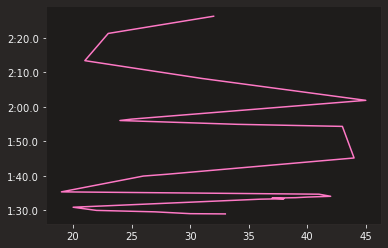

In [71]:
carlo_GP = carlo_GP['LapTime']

carlo_GP.plot()
pyplot.show()

In [72]:
carlo_GP

33   0 days 00:01:28.942000
30   0 days 00:01:29.014000
27   0 days 00:01:29.543000
22   0 days 00:01:29.962000
20   0 days 00:01:30.880000
36   0 days 00:01:33.219000
38   0 days 00:01:33.338000
37   0 days 00:01:33.539000
39   0 days 00:01:33.651000
40   0 days 00:01:33.829000
42   0 days 00:01:34.055000
41   0 days 00:01:34.665000
19   0 days 00:01:35.345000
26   0 days 00:01:39.928000
28   0 days 00:01:40.446000
44   0 days 00:01:45.176000
43   0 days 00:01:54.340000
34   0 days 00:01:54.942000
24   0 days 00:01:56.046000
25   0 days 00:01:56.449000
45   0 days 00:02:01.898000
31   0 days 00:02:08.252000
21   0 days 00:02:13.418000
23   0 days 00:02:21.312000
32   0 days 00:02:26.302000
Name: LapTime, dtype: timedelta64[ns]